<a href="https://colab.research.google.com/github/middhun-31/Robust-Probabilistic-Load-Forecasting-for-a-Single-Household/blob/main/Refit_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Project path
project_path = "/content/drive/Mydrive/refit_forecasting"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Connecting kaggle api

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json

#permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kagglehub[pandas-datasets]

Loading dataset

In [ ]:
import kagglehub

# Based on kagglehub documentation or examples, find the correct function
# As of kagglehub 0.3.13, there isn't a direct list_files function.
# Instead, you can download the dataset and then list files in the downloaded directory.

# First, download the dataset to a temporary location
dataset_path = kagglehub.dataset_download("kyleahmurphy/uk-electrical-load")

import os
# List files in the downloaded directory
files = os.listdir(dataset_path)
print(files)

100%|██████████| 886M/886M [00:23<00:00, 38.8MB/s]

Extracting files...


['House_20.csv', 'REFIT_Readme.txt', 'House_7.csv', 'House_13.csv', 'House_5.csv', 'House_11.csv', 'House_10.csv', 'House_19.csv', 'House_8.csv', 'House_3.csv', 'House_9.csv', 'House_12.csv', 'House_16.csv', 'House_17.csv', 'House_2.csv', 'House_21.csv', 'House_6.csv', 'House_1.csv', 'House_15.csv', 'House_4.csv', 'House_18.csv']


In [ ]:
import pandas as pd

df = pd.read_csv(dataset_path + '/House_1.csv')
df.head()

,Time,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9
0,2013-10-09 13:06:17,1381323977,523,74,0,69,0,0,0,0,0,1
1,2013-10-09 13:06:31,1381323991,526,75,0,69,0,0,0,0,0,1
2,2013-10-09 13:06:46,1381324006,540,74,0,68,0,0,0,0,0,1
3,2013-10-09 13:07:01,1381324021,532,74,0,68,0,0,0,0,0,1
4,2013-10-09 13:07:15,1381324035,540,74,0,69,0,0,0,0,0,1


Indexing and sorting

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time')
df = df.sort_index()


In [ ]:
df.head(-10)

,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9
Time,,,,,,,,,,,
2013-10-09 13:06:17,1381323977,523,74,0,69,0,0,0,0,0,1
2013-10-09 13:06:31,1381323991,526,75,0,69,0,0,0,0,0,1
2013-10-09 13:06:46,1381324006,540,74,0,68,0,0,0,0,0,1
2013-10-09 13:07:01,1381324021,532,74,0,68,0,0,0,0,0,1
2013-10-09 13:07:15,1381324035,540,74,0,69,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2015-07-10 11:54:58,1436529298,184,0,45,0,0,0,0,0,0,1
2015-07-10 11:55:04,1436529304,185,0,45,0,0,0,0,0,0,1
2015-07-10 11:55:11,1436529311,184,0,45,0,0,0,0,0,0,1


Handling NaN values

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)

Resampling

In [ ]:
df_resampled = df_imputed.resample('1min').mean()

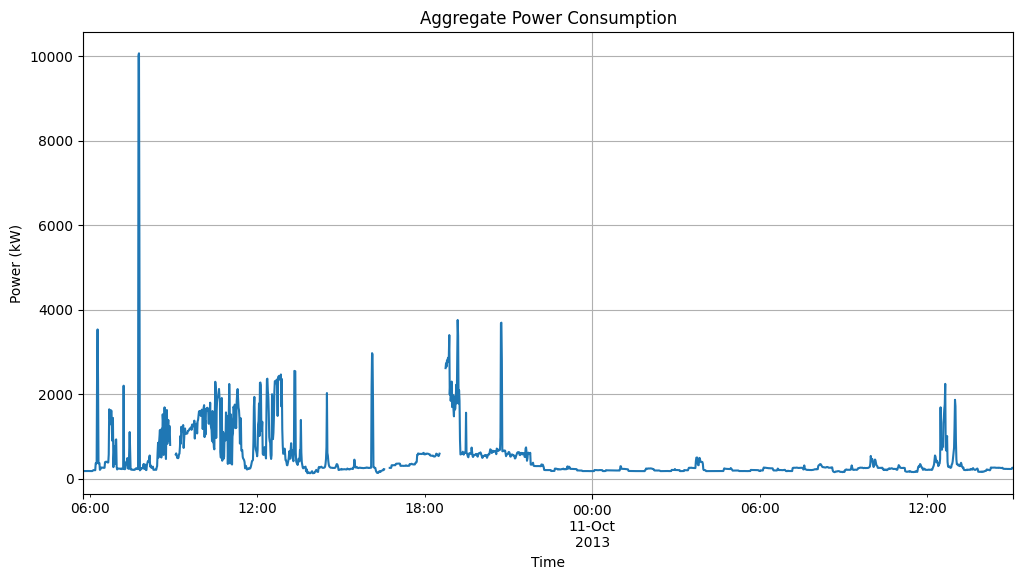

In [ ]:
import matplotlib.pyplot as plt
df_resampled_subset = df_resampled.iloc[1000:3000]
df_resampled_subset['Aggregate'].plot(figsize=(12, 6))
plt.title('Aggregate Power Consumption')
plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.grid(True)
plt.show()

Feature engineering

In [ ]:
df_resampled['hour'] = df_resampled.index.hour
df_resampled['dayofweek'] = df_resampled.index.dayofweek
df_resampled['month'] = df_resampled.index.month

In [ ]:
df_resampled.head()

,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,hour,dayofweek,month
Time,,,,,,,,,,,,,,
2013-10-09 13:06:00,1.381324e+09,529.666667,74.333333,0.0,68.666667,0.0,0.0,0.0,0.0,0.0,1.0,13,2,10
2013-10-09 13:07:00,1.381324e+09,543.875000,73.875000,0.0,68.750000,0.0,0.0,0.0,0.0,0.0,1.0,13,2,10
2013-10-09 13:08:00,1.381324e+09,578.000000,73.100000,0.0,41.900000,0.0,0.0,0.0,0.0,0.0,1.0,13,2,10
2013-10-09 13:09:00,1.381324e+09,638.300000,72.800000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,13,2,10
2013-10-09 13:10:00,1.381324e+09,800.200000,72.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,13,2,10


In [ ]:
df_resampled.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 920091 entries, 2013-10-09 13:06:00 to 2015-07-10 11:56:00
Freq: min
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unix        803773 non-null  float64
 1   Aggregate   803773 non-null  float64
 2   Appliance1  803773 non-null  float64
 3   Appliance2  803773 non-null  float64
 4   Appliance3  803773 non-null  float64
 5   Appliance4  803773 non-null  float64
 6   Appliance5  803773 non-null  float64
 7   Appliance6  803773 non-null  float64
 8   Appliance7  803773 non-null  float64
 9   Appliance8  803773 non-null  float64
 10  Appliance9  803773 non-null  float64
 11  hour        920091 non-null  int32  
 12  dayofweek   920091 non-null  int32  
 13  month       920091 non-null  int32  
dtypes: float64(11), int32(3)
memory usage: 94.8 MB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_norm = df_resampled.copy()
#Select float64 columns except unix
float_cols = df_norm.select_dtypes(include=['float64']).columns.drop('Unix')
#Normalize the columns
scaler = MinMaxScaler()
df_norm[float_cols] = scaler.fit_transform(df_norm[float_cols])

In [ ]:
df_norm.head(-1000)

,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,hour,dayofweek,month
Time,,,,,,,,,,,,,,
2013-10-09 13:06:00,1.381324e+09,0.018521,0.024197,0.000000,0.129046,0.0,0.000000,0.0,0.0,0.0,0.000479,13,2,10
2013-10-09 13:07:00,1.381324e+09,0.019116,0.024048,0.000000,0.129202,0.0,0.000000,0.0,0.0,0.0,0.000479,13,2,10
2013-10-09 13:08:00,1.381324e+09,0.020545,0.023796,0.000000,0.078743,0.0,0.000000,0.0,0.0,0.0,0.000479,13,2,10
2013-10-09 13:09:00,1.381324e+09,0.023070,0.023698,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000479,13,2,10
2013-10-09 13:10:00,1.381324e+09,0.029849,0.023438,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000479,13,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-09 19:12:00,1.436469e+09,0.003927,0.000000,0.023080,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000479,19,3,7
2015-07-09 19:13:00,1.436469e+09,0.003945,0.000000,0.023133,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000479,19,3,7
2015-07-09 19:14:00,1.436469e+09,0.003987,0.000000,0.023080,0.000000,0.0,0.000677,0.0,0.0,0.0,0.000479,19,3,7


Splitting data

In [ ]:
 split_index = int(len(df_norm) * 0.8)
 train_house1 = df_norm.iloc[:split_index]
 test_house1 = df_norm.iloc[split_index:]

In [ ]:
#Visualization

##Setup and Data prep

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')

# --- IMPORTANT ---
# Ensure the 'Time' index is a DatetimeIndex
df_norm.index = pd.to_datetime(df_norm.index)


##Daily seasonality analysis

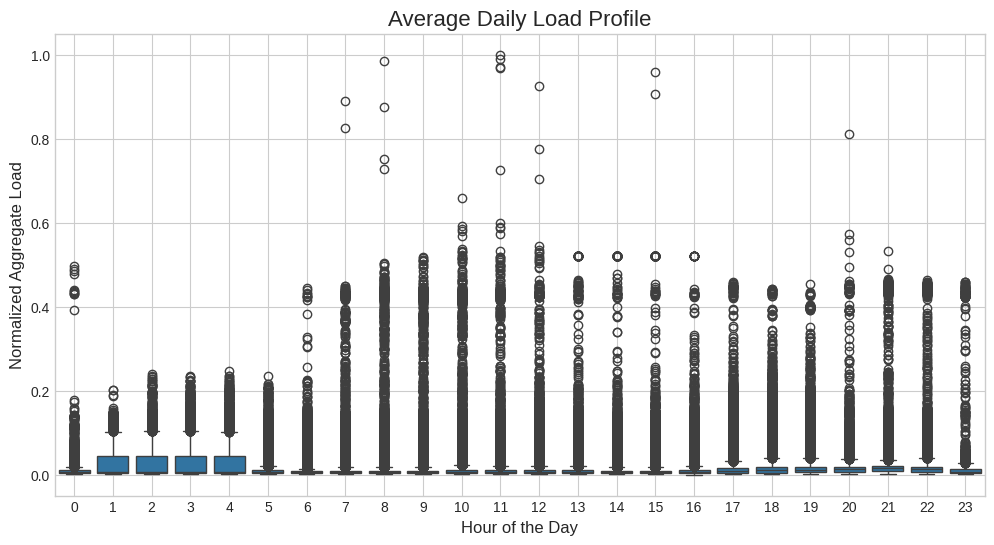

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create a figure and axes for the plots
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn to create a boxplot of Aggregate load vs. hour
sns.boxplot(data=df_norm, x='hour', y='Aggregate', ax=ax)

# Set titles and labels for clarity
ax.set_title('Average Daily Load Profile', fontsize=16)
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_ylabel('Normalized Aggregate Load', fontsize=12)
ax.grid(True)

plt.show()
plt.savefig('/content/drive/MyDrive/Refit_project/preprocessing_graphs/Daily_load_profile.png')

##Weekly seasonality

/tmp/ipython-input-1839472950.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_names)


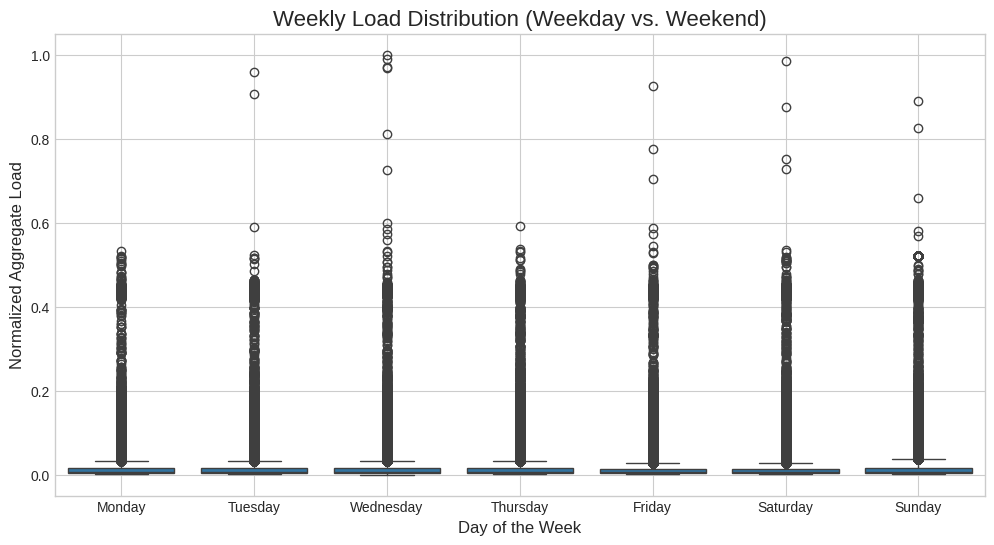

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot of Aggregate load vs. dayofweek
sns.boxplot(data=df_norm, x='dayofweek', y='Aggregate', ax=ax)

# Improve x-axis labels for readability
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticklabels(day_names)

# Set titles and labels
ax.set_title('Weekly Load Distribution (Weekday vs. Weekend)', fontsize=16)
ax.set_xlabel('Day of the Week', fontsize=12)
ax.set_ylabel('Normalized Aggregate Load', fontsize=12)
ax.grid(True)

plt.show()

##Monthly seasonality

/tmp/ipython-input-4176026635.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])


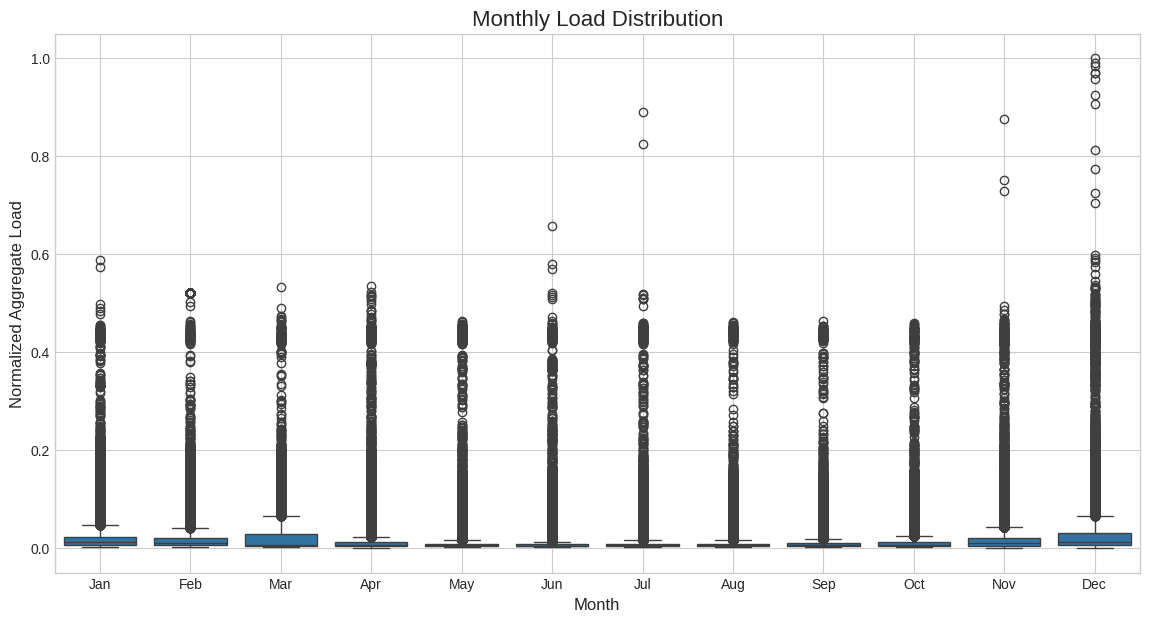

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(14, 7))

# Create a boxplot of Aggregate load vs. month
sns.boxplot(data=df_norm, x='month', y='Aggregate', ax=ax)

# Improve x-axis labels with month names
import calendar
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])

# Set titles and labels
ax.set_title('Monthly Load Distribution', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Normalized Aggregate Load', fontsize=12)
ax.grid(True)

plt.show()

##Overall trend and yearly pattern

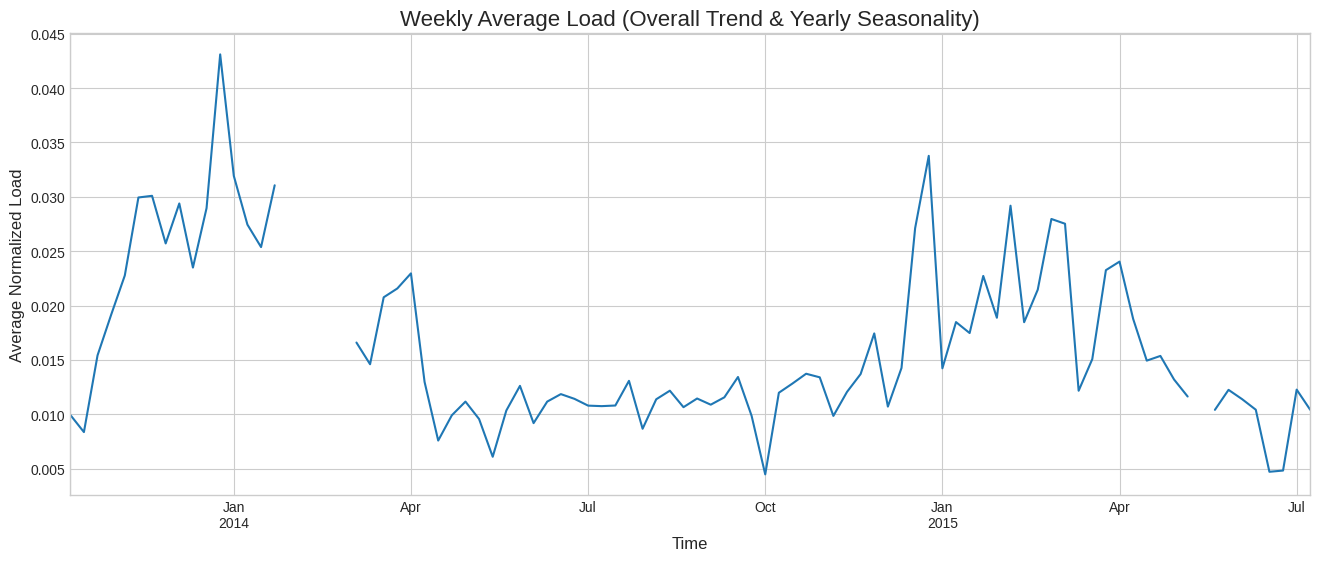

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(16, 6))

# Resample the data to get the mean weekly load and plot it
df_norm['Aggregate'].resample('W').mean().plot(ax=ax)

# Set titles and labels
ax.set_title('Weekly Average Load (Overall Trend & Yearly Seasonality)', fontsize=16)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Average Normalized Load', fontsize=12)
ax.grid(True)

plt.show()

##A Comparative Study of Imputation Methods
import libraries and plot

In [ ]:
# --- 0. Setup: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set a professional plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 8)

 Resample to daily average. This is our main working dataset for the experiment.
 The real gap in your data will now appear as NaN values for those days.

In [ ]:
df_daily = df_norm.resample('D').mean()
print("--- Step 1: Data Prepared ---")
print(f"Daily data shape: {df_daily.shape}")
print(f"Number of missing days in original data: {df_daily['Aggregate'].isnull().sum()}")


--- Step 1: Data Prepared ---
Daily data shape: (640, 14)
Number of missing days in original data: 61


 The Experiment: Create an Artificial Gap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 8)

# --- 1. Data Preparation ---
# Ensure df_daily is your daily-resampled DataFrame
# df_daily = df_norm.resample('D').mean()
print("--- Step 1: Data Prepared ---")
print(f"Daily data shape: {df_daily.shape}")

# --- 2. The Experiment: Programmatically Find a Valid Range and Create Gap --- 🧪
print("\n--- Step 2: Finding a valid date range and setting up the experiment ---")

# First, we automatically find the longest clean stretch to avoid errors
not_null_series = df_daily['Aggregate'].notnull()
blocks = (not_null_series.diff().ne(0)).cumsum()
block_lengths = blocks[not_null_series].value_counts()

if block_lengths.empty:
    print("Error: No continuous blocks of data found. Check your initial DataFrame.")
else:
    longest_block_id = block_lengths.idxmax()
    longest_block_index = blocks[blocks == longest_block_id].index
    start_date = longest_block_index.min()

    # Automatically select a 90-day period for the experiment
    exp_start = start_date
    exp_end = start_date + pd.Timedelta(days=89)
    holdout_start = start_date + pd.Timedelta(days=30)
    holdout_end = start_date + pd.Timedelta(days=59)

    print(f"Experiment will run from {exp_start.date()} to {exp_end.date()}.")
    print(f"Hold-out (ground truth) period is from {holdout_start.date()} to {holdout_end.date()}.")

    # Create the testbed with the artificial gap
    df_experiment = df_daily.loc[exp_start:exp_end].copy()
    ground_truth = df_experiment.loc[holdout_start:holdout_end].copy()
    df_with_gap = df_experiment.copy()
    df_with_gap.loc[holdout_start:holdout_end, :] = np.nan

    # Verification step
    print(f"Verification: Shape of ground_truth DataFrame is {ground_truth.shape}.")
    if ground_truth.shape[0] == 0:
        print("CRITICAL ERROR: Ground truth is still empty. Please check the date finding logic and your data.")
    else:
        print("Artificial gap created successfully in a valid date range.")

        # ... (The rest of your script: Steps 3, 4, and 5) ...
        # (Paste the code for applying methods, evaluating, and plotting here)

--- Step 1: Data Prepared ---
Daily data shape: (640, 14)

--- Step 2: Finding a valid date range and setting up the experiment ---
Experiment will run from 2014-09-01 to 2014-11-29.
Hold-out (ground truth) period is from 2014-10-01 to 2014-10-30.
Verification: Shape of ground_truth DataFrame is (30, 14).
Artificial gap created successfully in a valid date range.


Apply Imputation Methods

Linear interpolation

In [ ]:
print("\n--- Step 3: Applying Imputation Methods ---")
# Method 1: Linear Interpolation (our simple baseline)
df_linear_imputed = df_with_gap.interpolate(method='linear')


--- Step 3: Applying Imputation Methods ---


MICE

In [ ]:
mice_imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data_mice = mice_imputer.fit_transform(df_with_gap)
df_mice_imputed = pd.DataFrame(imputed_data_mice, index=df_with_gap.index, columns=df_with_gap.columns)
print("Applied Linear Interpolation and MICE methods.")

Applied Linear Interpolation and MICE methods.


k-Nearest Neighbors (kNN)

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data_knn = knn_imputer.fit_transform(df_with_gap)
df_knn_imputed = pd.DataFrame(imputed_data_knn, index=df_with_gap.index, columns=df_with_gap.columns)


Evaluate and Select the Best Method

In [ ]:
target_col = "Aggregate"
ground_truth_values = ground_truth[target_col] # Select only the target column
linear_imputed_values = df_linear_imputed.loc[holdout_start:holdout_end, target_col]
mice_imputed_values = df_mice_imputed.loc[holdout_start:holdout_end, target_col]
knn_imputed_values = df_knn_imputed.loc[holdout_start:holdout_end, target_col]

# Calculate metrics for all three methods
results = [
    {'Method': 'Linear Interpolation',
     'RMSE': np.sqrt(mean_squared_error(ground_truth_values, linear_imputed_values)),
     'MAE': mean_absolute_error(ground_truth_values, linear_imputed_values)},
    {'Method': 'MICE',
     'RMSE': np.sqrt(mean_squared_error(ground_truth_values, mice_imputed_values)),
     'MAE': mean_absolute_error(ground_truth_values, mice_imputed_values)},
    {'Method': 'kNN',
     'RMSE': np.sqrt(mean_squared_error(ground_truth_values, knn_imputed_values)),
     'MAE': mean_absolute_error(ground_truth_values, knn_imputed_values)}
]
df_results = pd.DataFrame(results).set_index('Method')

print("--- Imputation Performance Metrics ---")
print(df_results)

--- Imputation Performance Metrics ---
                          RMSE       MAE
Method                                  
Linear Interpolation  0.004158  0.003206
MICE                  0.004433  0.003300
kNN                   0.004433  0.003300


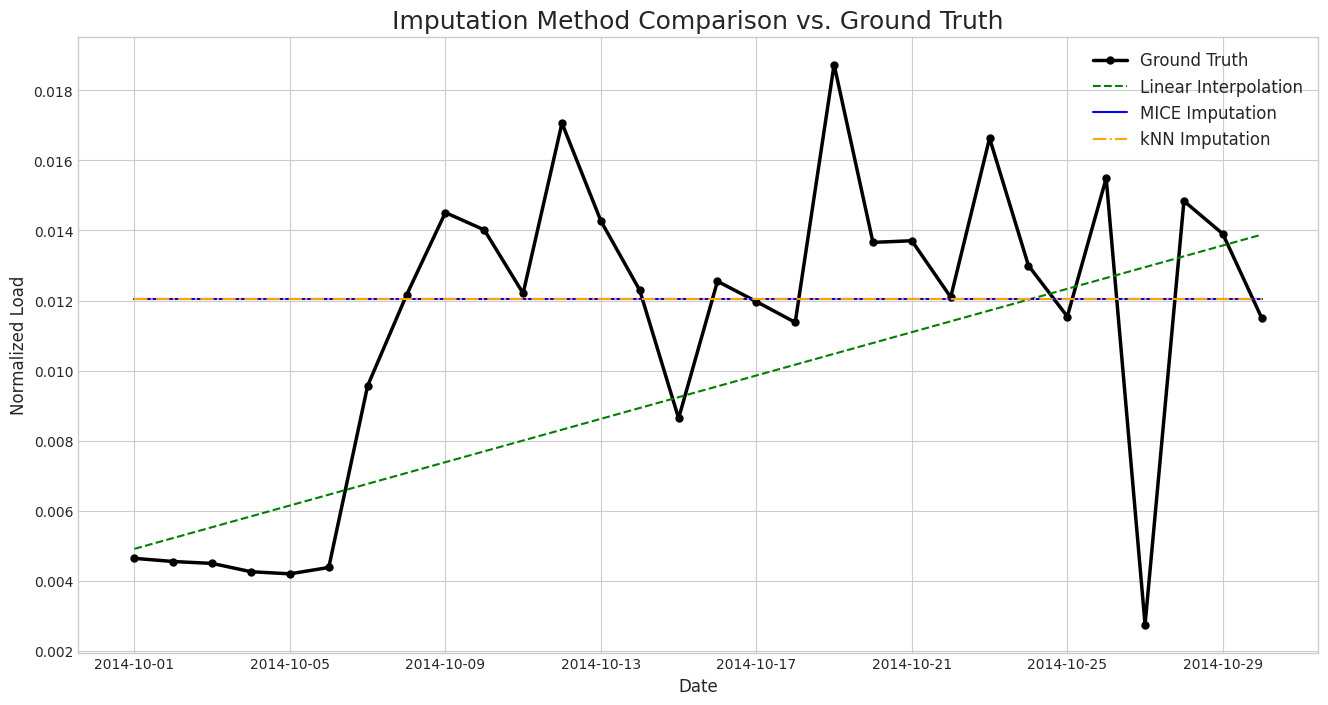


Conclusion: Based on the lower RMSE, the best imputation method is 'Linear Interpolation'.


In [ ]:
plt.plot(ground_truth.index, ground_truth_values, label='Ground Truth', color='black', linewidth=2.5, marker='o', markersize=5)
plt.plot(linear_imputed_values.index, linear_imputed_values, label='Linear Interpolation', color='green', linestyle='--')
plt.plot(mice_imputed_values.index, mice_imputed_values, label='MICE Imputation', color='blue', linestyle='-')
plt.plot(knn_imputed_values.index, knn_imputed_values, label='kNN Imputation', color='orange', linestyle='-.')
plt.title('Imputation Method Comparison vs. Ground Truth', fontsize=18)
plt.ylabel('Normalized Load', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(fontsize=12)
plt.show()

# Programmatically select the best method
best_method = df_results['RMSE'].idxmin()
print(f"\nConclusion: Based on the lower RMSE, the best imputation method is '{best_method}'.")


In [ ]:
best_method = df_results['RMSE'].idxmin()
print(f"\nConclusion: Based on the lower RMSE, the best imputation method is '{best_method}'.")



Conclusion: Based on the lower RMSE, the best imputation method is 'Linear Interpolation'.


To select best model from knn and MICE

/tmp/ipython-input-2963056218.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(mice_imputed_values, color='#0072B2', label='MICE Imputed',


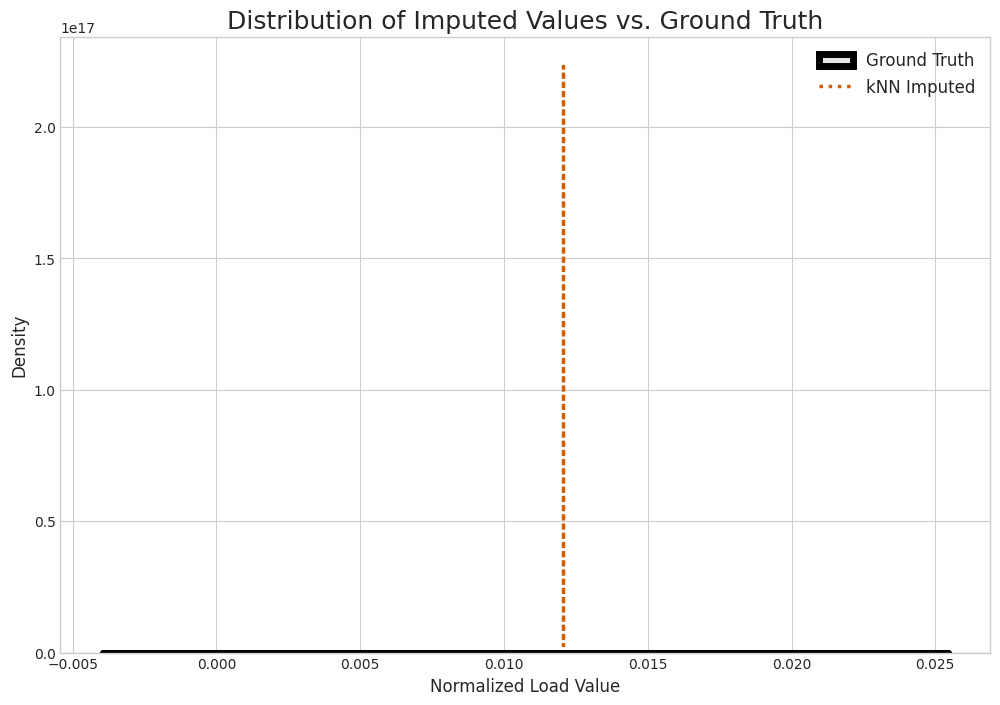

In [ ]:
plt.figure(figsize=(12, 8))

# We use Kernel Density Estimate (KDE) plots for a smooth representation of the distribution.
# The 'fill' on the ground truth makes it a clear visual baseline.
sns.kdeplot(ground_truth_values, color='black', label='Ground Truth',
            linewidth=5, fill=True, alpha=0.1)

sns.kdeplot(mice_imputed_values, color='#0072B2', label='MICE Imputed',
            linestyle='--', linewidth=2.5)

sns.kdeplot(knn_imputed_values, color='#D55E00', label='kNN Imputed',
            linestyle=':', linewidth=2.5)

plt.title('Distribution of Imputed Values vs. Ground Truth', fontsize=18)
plt.xlabel('Normalized Load Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.show()

#Seasonal imputation
As MICE and linear interpolation failed we move on to Seasonal imputation

--- Step 1: Data Prepared ---
Using valid date range: 2014-09-01 to 2014-11-29.
Artificial gap created successfully.

--- Step 3: Applying Imputation Methods ---
Applied Linear and Seasonal imputation methods.

--- Step 4: Evaluating Methods ---
--- Imputation Performance Metrics ---
                          RMSE       MAE
Method                                  
Linear Interpolation  0.004158  0.003206
Seasonal Imputer      0.004329  0.003328


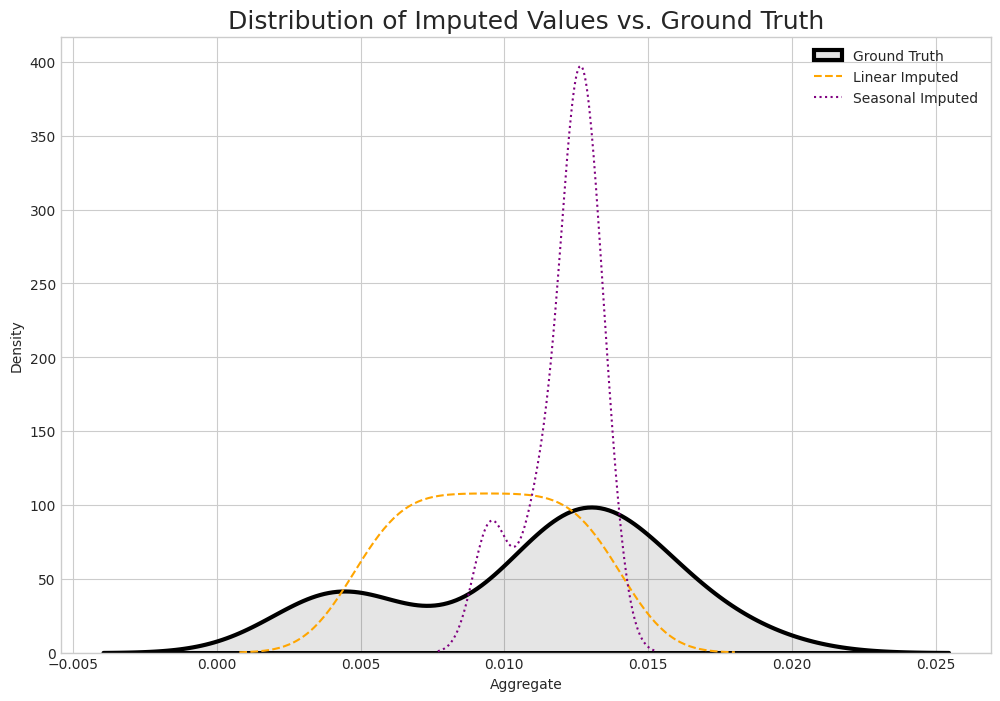

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set a professional plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 8)

try:
    # --- 1. Data Preparation ---
    df_daily = df_norm.resample('D').mean()
    print("--- Step 1: Data Prepared ---")

    # --- 2. The Experiment: Find a Valid Range and Create Gap --- 🧪
    not_null_series = df_daily['Aggregate'].notnull()
    blocks = (not_null_series.diff().ne(0)).cumsum()
    block_lengths = blocks[not_null_series].value_counts()

    if block_lengths.empty or block_lengths.max() < 90:
        raise ValueError("Could not find a continuous block of data long enough (90 days) for the experiment.")

    longest_block_id = block_lengths.idxmax()
    longest_block_index = blocks[blocks == longest_block_id].index
    start_date = longest_block_index.min()

    exp_start, exp_end = start_date, start_date + pd.Timedelta(days=89)
    holdout_start, holdout_end = start_date + pd.Timedelta(days=30), start_date + pd.Timedelta(days=59)

    print(f"Using valid date range: {exp_start.date()} to {exp_end.date()}.")
    df_experiment = df_daily.loc[exp_start:exp_end].copy()
    ground_truth = df_experiment.loc[holdout_start:holdout_end].copy()
    df_with_gap = df_experiment.copy()
    df_with_gap.loc[holdout_start:holdout_end, :] = np.nan
    print("Artificial gap created successfully.")

    # --- 3. Apply Imputation Methods ---
    print("\n--- Step 3: Applying Imputation Methods ---")

    # Method 1: Linear Interpolation
    df_linear_imputed = df_with_gap.interpolate(method='linear')

    # Method 2: Seasonal Imputation (by day of the week)
    # This fills NaNs with the mean value for that day of the week from the rest of the series
    dayofweek_map = df_with_gap['Aggregate'].dropna().groupby(lambda x: x.dayofweek).mean()
    df_seasonal_imputed = df_with_gap.copy()
    # Apply the map to the index of the missing values
    imputed_values = df_seasonal_imputed['Aggregate'].loc[lambda x: x.isnull()].index.map(lambda x: dayofweek_map[x.dayofweek])
    df_seasonal_imputed.loc[df_seasonal_imputed['Aggregate'].isnull(), 'Aggregate'] = imputed_values


    print("Applied Linear and Seasonal imputation methods.")

    # --- 4. Evaluate and Visualize --- 📊
    print("\n--- Step 4: Evaluating Methods ---")
    target_col = 'Aggregate'
    ground_truth_values = ground_truth[target_col]
    linear_imputed_values = df_linear_imputed.loc[holdout_start:holdout_end, target_col]
    seasonal_imputed_values = df_seasonal_imputed.loc[holdout_start:holdout_end, target_col]

    # Calculate metrics
    results = [
        {'Method': 'Linear Interpolation',
         'RMSE': np.sqrt(mean_squared_error(ground_truth_values, linear_imputed_values)),
         'MAE': mean_absolute_error(ground_truth_values, linear_imputed_values)},
        {'Method': 'Seasonal Imputer',
         'RMSE': np.sqrt(mean_squared_error(ground_truth_values, seasonal_imputed_values)),
         'MAE': mean_absolute_error(ground_truth_values, seasonal_imputed_values)}
    ]
    df_results = pd.DataFrame(results).set_index('Method')
    print("--- Imputation Performance Metrics ---")
    print(df_results)

    # Visualization
    plt.figure(figsize=(12, 8))
    sns.kdeplot(ground_truth_values, color='black', label='Ground Truth', linewidth=3, fill=True, alpha=0.1)
    sns.kdeplot(linear_imputed_values, color='orange', label='Linear Imputed', linestyle='--')
    sns.kdeplot(seasonal_imputed_values, color='purple', label='Seasonal Imputed', linestyle=':')
    plt.title('Distribution of Imputed Values vs. Ground Truth', fontsize=18)
    plt.legend()
    plt.show()

except Exception as e:
    print(f"\nAn error occurred: {e}")

Pipeline

In [ ]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

# Custom Transformer to create time-based features
class TimeFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything, so we just return self
        return self

    def transform(self, X, y=None):
        # Make a copy to avoid changing the original DataFrame
        X_ = X.copy()
        X_['hour'] = X_.index.hour
        X_['dayofweek'] = X_.index.dayofweek
        X_['month'] = X_.index.month
        return X_

# Custom Transformer for our Seasonal Imputation logic
class SeasonalImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imputation_map_ = None

    def fit(self, X, y=None):
        # Learn the seasonal average from the training data
        # The 'season' is a combination of day of week and hour of day
        X_ = X.copy()
        self.imputation_map_ = X_.groupby([X_.index.dayofweek, X_.index.hour])['Aggregate'].transform('mean')
        return self

    def transform(self, X, y=None):
        # Apply the learned map and then forward-fill the rest
        X_ = X.copy()
        X_['Aggregate'].fillna(self.imputation_map_, inplace=True)
        # Forward-fill can handle any remaining NaNs or other columns
        X_.fillna(method='ffill', inplace=True)
        return X_

In [ ]:
# --- 0. Load and Resample Data (Pandas Steps) ---
# df = pd.read_csv(...) # Load your raw data
#df.set_index('Time', inplace=True)
df.index = pd.to_datetime(df.index)
df_hourly = df.resample('H').mean()
print("--- Data Loaded and Resampled to Hourly ---")


# --- 1. Define the Pipeline ---
# The pipeline chains all our steps in order.
preprocessing_pipeline = make_pipeline(
    TimeFeatureTransformer(),
    SeasonalImputer(),
    MinMaxScaler()
)
print("\n--- Preprocessing Pipeline Created ---")
print(preprocessing_pipeline)


# --- 2. Run the Pipeline ---
# The .fit_transform() method executes all steps on our data.
processed_data = preprocessing_pipeline.fit_transform(df_hourly)

final_column_names = list(df_hourly.columns) + ['hour', 'dayofweek', 'month']
# The pipeline outputs a NumPy array, so we convert it back to a DataFrame
df_processed = pd.DataFrame(processed_data, index=df_hourly.index, columns=final_column_names)
print("\n--- Pipeline Executed Successfully ---")


# --- 3. Final Verification ---
print("\n--- Final Verification ---")
print("Data preprocessing complete. Here is a sample of the final DataFrame:")
print(df_processed.head())
print("\nVerifying no missing values:")
print(df_processed.isnull().sum().sum())
print("\nVerifying scaling (values should be between 0 and 1):")
print(df_processed.describe())

/tmp/ipython-input-1048628594.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()


--- Data Loaded and Resampled to Hourly ---

--- Preprocessing Pipeline Created ---
Pipeline(steps=[('timefeaturetransformer', TimeFeatureTransformer()),
                ('seasonalimputer', SeasonalImputer()),
                ('minmaxscaler', MinMaxScaler())])

--- Pipeline Executed Successfully ---

--- Final Verification ---
Data preprocessing complete. Here is a sample of the final DataFrame:
                         Unix  Aggregate  Appliance1  Appliance2  Appliance3  \
Time                                                                           
2013-10-09 13:00:00  0.000000   0.066201    0.014121    0.139356    0.018726   
2013-10-09 14:00:00  0.000061   0.040419    0.002357    0.135018    0.351616   
2013-10-09 15:00:00  0.000126   0.036223    0.030211    0.128372    0.312064   
2013-10-09 16:00:00  0.000191   0.011249    0.000588    0.126824    0.081957   
2013-10-09 17:00:00  0.000256   0.012427    0.031421    0.155780    0.302780   

                     Appliance4  Applian

/tmp/ipython-input-3282958881.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_['Aggregate'].fillna(self.imputation_map_, inplace=True)
/tmp/ipython-input-3282958881.py:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_.fillna(method='ffill', inplace=True)


In [ ]:
df_processed.to_parquet('/content/drive/MyDrive/Refit_project/house1_processed.parquet')

In [ ]:
import joblib

# This code goes in your PREPROCESSING notebook, after the scaler is fitted.

# Define a path in your Google Drive to save the scaler
scaler_path = '/content/drive/MyDrive/Refit_project/scaler.gz'

# Save the fitted scaler object
joblib.dump(scaler, scaler_path)

print(f"Scaler saved to: {scaler_path}")

Scaler saved to: /content/drive/MyDrive/Refit_project/scaler.gz
